![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_2/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_2/refs/heads/main/data/datos_clientes.csv')
df.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


Se cargan los datos del csv por medio de la URL de Github, adicionalmente, se cargan dentro de un dataframe

### 2. Análisis preliminar.

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [62]:
# Definir la función de clasificación de edades por grupos etarios
def clasificar_edad(edad):
    if edad <= 24:
        return "18-24"
    elif edad > 24 and edad <= 34:
        return "25-34"
    elif edad > 34 and edad <= 44:
        return "35-44"
    elif edad > 44 and edad <= 54:
        return "45-54"
    elif edad > 54 and edad <= 64:
        return "55-64"
    else:
        return "65+"

# Crear la nueva columna categórica para grupos etarios
df['GruposEtarios'] = df['Edad'].apply(clasificar_edad)

# Mostrar el DataFrame resultante
df


,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,GruposEtarios
0,1,Mujer,41,98115.05,39,35-44
1,2,Mujer,20,35458.14,75,18-24
2,3,Mujer,68,59872.08,55,65+
3,4,Hombre,63,48508.93,51,55-64
4,5,Mujer,31,44431.11,54,25-34
...,...,...,...,...,...,...
195,196,Mujer,30,19322.17,72,25-34
196,197,Mujer,50,43486.37,45,45-54
197,198,Hombre,35,24086.95,35,35-44
198,199,Mujer,24,38599.28,65,18-24


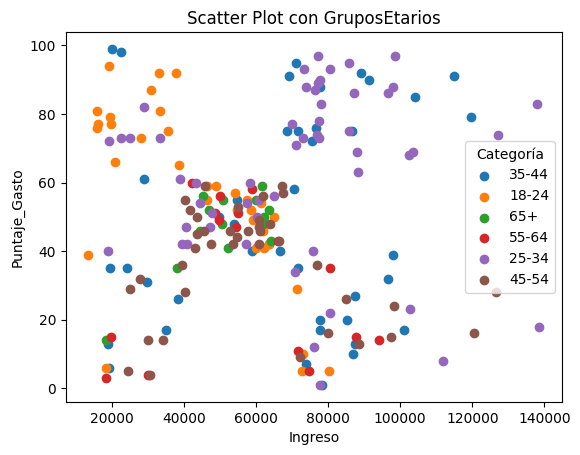

In [ ]:
# Crear el scatter plot
fig, ax = plt.subplots()

# Usar un bucle para graficar cada categoría con un color diferente
categorias = df['GruposEtarios'].unique()
categorias2 = df['Genero'].unique()

for categoria in categorias:
    subset = df[df['GruposEtarios'] == categoria]
    ax.scatter(subset['Ingreso'], subset['Puntaje_Gasto'], label=categoria)

# Añadir leyenda y etiquetas
ax.legend(title='Categoría')
ax.set_xlabel('Ingreso')
ax.set_ylabel('Puntaje_Gasto')
ax.set_title('Scatter Plot con GruposEtarios')

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear el scatter plot
fig, ax = plt.subplots()

# Usar un bucle para graficar cada categoría con un color diferente
categorias = df['GruposEtarios'].unique()
categorias2 = df['Genero'].unique()

for categoria in categorias:
    subset = df[df['GruposEtarios'] == categoria]
    ax.scatter(subset['Ingreso'], subset['Puntaje_Gasto'], label=categoria)

# Añadir leyenda y etiquetas
ax.legend(title='Categoría')
ax.set_xlabel('Ingreso')
ax.set_ylabel('Puntaje_Gasto')
ax.set_title('Scatter Plot con GruposEtarios')

# Mostrar el gráfico
plt.show()


In [60]:

# Agrupar por la variable categórica y calcular estadísticas descriptivas
estadisticas_por_categoria = df.groupby('Genero').describe()

# Mostrar las estadísticas descriptivas por categoría
round(estadisticas_por_categoria[['Ingreso', 'Puntaje_Gasto']],2)


Ingreso                                                              \
         count      mean       std       min       25%       50%       75%   
Genero                                                                       
Hombre    88.0  62126.66  26765.49  13458.02  45003.08  61706.56  77731.30   
Mujer    112.0  59444.14  25920.46  15766.84  40013.41  59355.30  76788.39   

                  Puntaje_Gasto                                             
              max         count   mean    std  min   25%   50%   75%   max  
Genero                                                                      
Hombre  138584.52          88.0  48.51  27.90  1.0  24.5  50.0  70.0  97.0  
Mujer   126685.78         112.0  51.53  24.11  5.0  35.0  50.0  73.0  99.0

(Utilice este espacio para describir su procedimiento)

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importnacia de estandarizar los datos.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)